In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
rng = np.random.default_rng(237800129231587500768862935996202802056)

In [3]:
sigma_I = 0.1

def current_measurement(r, R, V):
    Itrue = V / (R + r)
    Iobs = rng.normal(loc=Itrue, scale=sigma_I)
    return Iobs

In [4]:
V_true = rng.uniform(low=1, high=2)
R_true = rng.uniform(low=1, high=2)

rs = linspace(0.1, 10, 100)
Iobs = [current_measurement(r, R_true, V_true) for r in rs]

Text(0, 0.5, '$I(r)$ ($\\mathrm{A}$)')

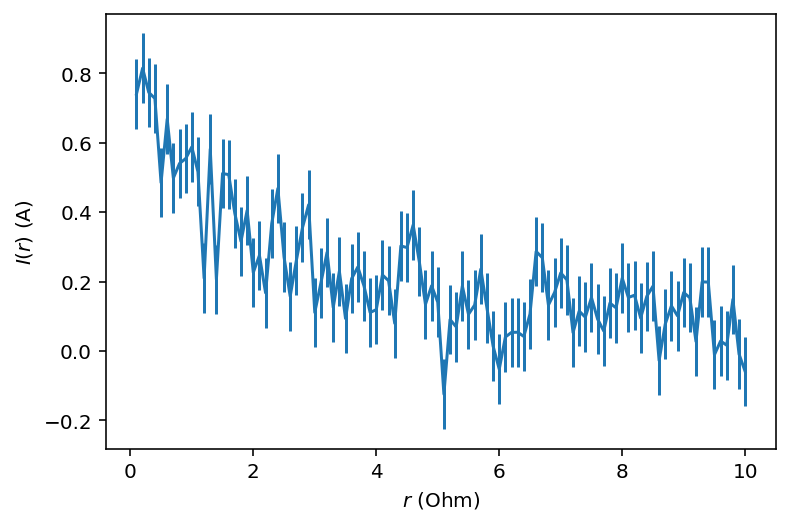

In [5]:
errorbar(rs, Iobs, yerr=sigma_I)
xlabel(r'$r$ ($\mathrm{Ohm}$)')
ylabel(r'$I(r)$ ($\mathrm{A}$)')

In [6]:
#print('r\tIobs')
#for r, I in zip(rs, Iobs):
#    print('{:.3f}\t{:.3f}'.format(r, I))

$$
x \mapsto r \\
f(x) \mapsto I_\mathrm{obs} \\
I_\mathrm{obs}\left( r, V_\mathrm{true}, R_\mathrm{true} \right)
$$

In [7]:
# proposal function q(x'|x) where x is a 2-component vector
def q(x):
    # draw from a multivariate gaussian with mean [0,0] and covariance matrix I
    # Add the randomly drawn number to x and return the sum
    mu = np.array([0.0, 0.0])
    sigma = np.matrix([ [1.0,0.0], [0.0,1.0] ])    # covariance matrix
    q = stats.multivariate_normal.rvs(mean=mu, cov=sigma)
    return x + q

Part (a)

In [8]:
# density function f(x) maps to Iobs(r)
# takes a vector x = (x1, x2) as input
def make_Iobs(r):
    def I_observed(V, R):
        return current_measurement(r, V, R)
    return I_observed

Run MCMC

In [9]:
# Start with MCMC where r is the first entry of rs array
r = rs[0]
f = make_Iobs(r)

# Markov chain
VRs = [[0.0,0.0]]    # array of V, R ordered pairs 
                     # for the given little r

for i in range(10000):
    
    # Take the last entry in the Markov chain
    VR = VRs[-1]
    V = VR[0]
    R = VR[1]
    
    # propose a new ordered pair of V, R
    VR_new = q(VR)
    V_new = VR_new[0]
    R_new = VR_new[1]
    
    # accept if acceptance ratio is greater than 
    # a randomly generated value from 0 to 1
    accept_ratio = f(V_new, R_new)/f(V, R)
    if rand() < accept_ratio:
        VRs.append(VR_new)
    else:
        VRs.append(VR)

In [10]:
#plot(xs)

(array([0.00427903, 0.00693579, 0.00524299, 0.00663015, 0.01114429,
        0.00712388, 0.00545459, 0.00246867, 0.0111678 , 0.10810429,
        0.00293889, 0.00479628, 0.02558014, 0.00583077, 0.01072109,
        0.01253145, 0.00103449, 0.00065831, 0.00112854, 0.00136365]),
 array([ 0.        ,  4.25287493,  8.50574985, 12.75862478, 17.01149971,
        21.26437463, 25.51724956, 29.77012449, 34.02299941, 38.27587434,
        42.52874926, 46.78162419, 51.03449912, 55.28737404, 59.54024897,
        63.7931239 , 68.04599882, 72.29887375, 76.55174868, 80.8046236 ,
        85.05749853]),
 <a list of 20 Patch objects>)

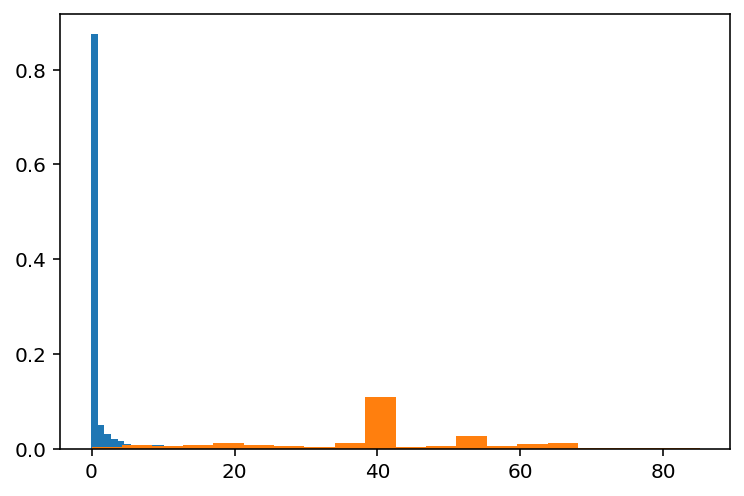

In [11]:
# Extract V- and R-coordinates from the array of vectors
Vs = []    # list of V values
Rs = []    # list of R values
for i in VRs:
    Vs.append(i[0])
    Rs.append(i[1])

# Generate 1-dimensional histograms of V- and R-coordinates
hist(Vs, density=True, bins=20)
hist(Rs, density=True, bins=20)

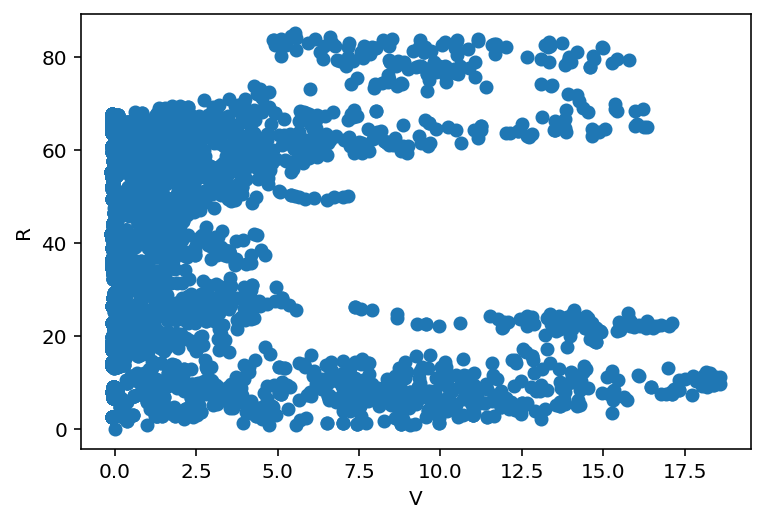

In [13]:
# Generate Scatter plot
scatter(Vs, Rs)
plt.xlabel('V')
plt.ylabel('R')

show()

c:\software\python\python3.7.4\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\software\python\python3.7.4\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


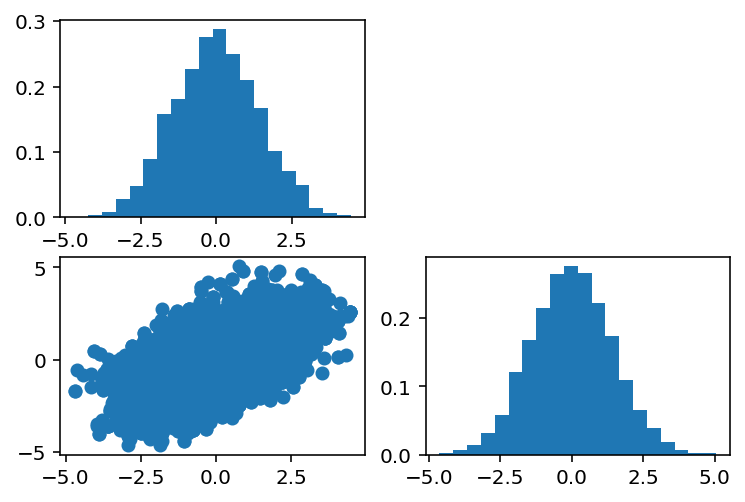

In [41]:
# histogram of x values
subplot(221)
hist(x_axis, normed=True, bins=20)

#Scatter plot
subplot(223)
scatter(x_axis, y_axis)

# histogram of y values
subplot(224)
hist(y_axis, normed=True, bins=20)

show()